**Description:** This program uses an arificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (TESLA) using the past 60 days stock price.

In [2]:
#import libraries
import numpy as np
import math
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quote
df = web.DataReader('NIO', data_source='yahoo', start='2010-01-01',
                      end='2021-03-31')
 
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-12,6.930000,5.350000,6.000000,6.600000,66849000,6.600000
2018-09-13,12.690000,6.520000,6.620000,11.600000,158346500,11.600000
2018-09-14,13.800000,9.220000,12.660000,9.900000,172473600,9.900000
2018-09-17,9.750000,8.500000,9.610000,8.500000,56323900,8.500000
2018-09-18,9.100000,7.670000,8.730000,7.680000,41827600,7.680000
...,...,...,...,...,...,...
2021-03-25,39.189999,35.119999,35.240002,37.939999,118082000,37.939999
2021-03-26,36.650002,34.000000,35.650002,36.130001,163039700,36.130001
2021-03-29,36.840000,34.500000,35.259998,35.509998,83188200,35.509998


In [4]:
#Get the number of rows and columns
df.shape

(642, 6)

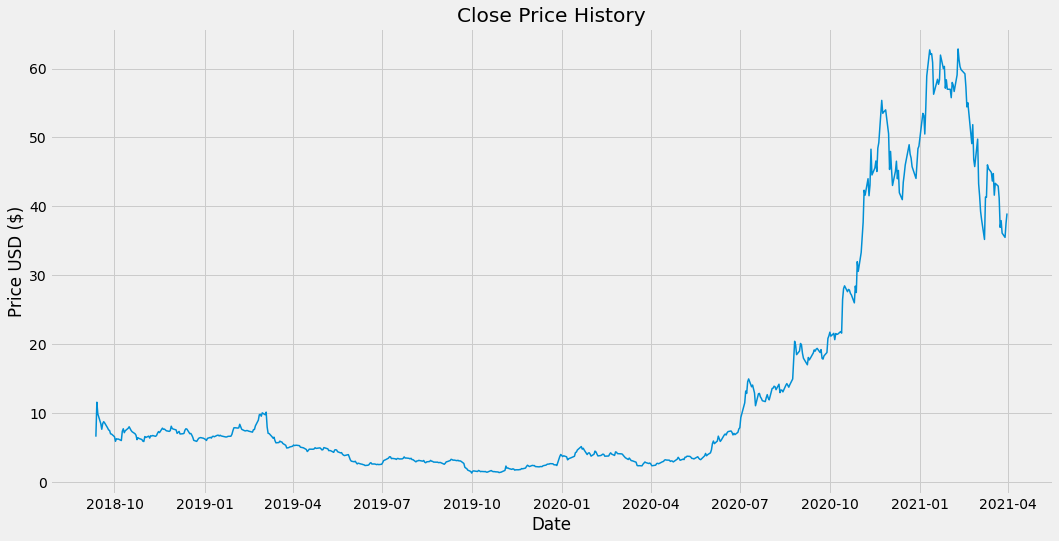

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], lw=1.5)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

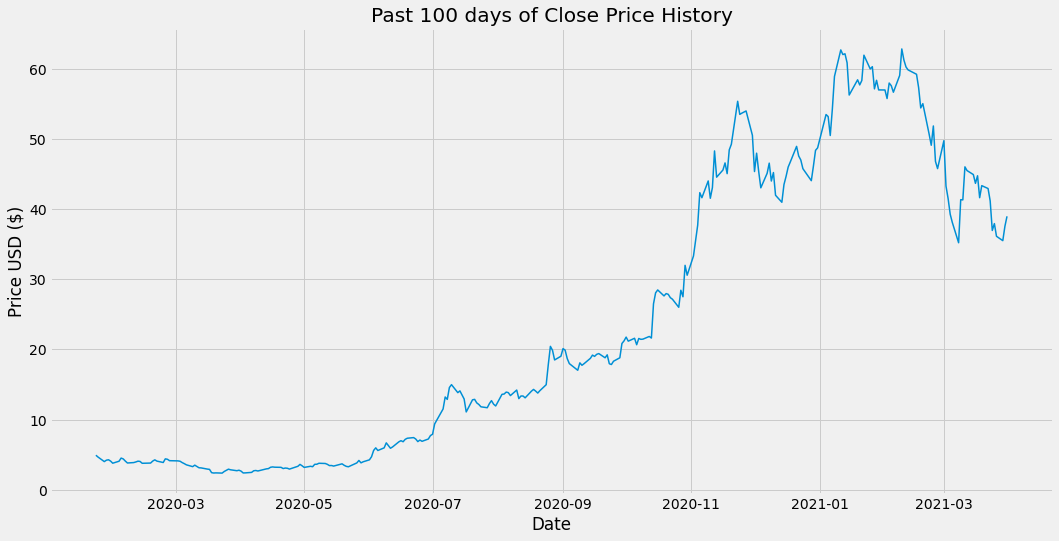

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(df['Close'][len(df['Close']) - 300:], lw=1.5)
plt.title('Past 100 days of Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [7]:
#Create a new dataframe with only the Close Price
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len
dataset.shape

(642, 1)

In [8]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1));
scaled_data = scaler.fit_transform(dataset);
 
scaled_data;

In [9]:
#Creating the training Dataset
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

    if i <= 60 :
        print(x_train)
        print(y_train)
        print()

[array([0.08582575, 0.16710014, 0.13946683, 0.11671001, 0.10338101,
       0.11671001, 0.12126137, 0.11817295, 0.10646944, 0.10175552,
       0.10045514, 0.09249025, 0.0920026 , 0.08582575, 0.07493498,
       0.08094929, 0.08013654, 0.08029909, 0.07672302, 0.0986671 ,
       0.10451885, 0.09525357, 0.09980494, 0.1056567 , 0.10923277,
       0.10484395, 0.10045514, 0.09752926, 0.09281535, 0.08923927,
       0.07883615, 0.08338751, 0.08176203, 0.07916125, 0.07526007,
       0.07444733, 0.08615084, 0.08403771, 0.08712613, 0.08257477,
       0.08810143, 0.08728869, 0.08858908, 0.08663849, 0.08875163,
       0.09395318, 0.09785436, 0.09541612, 0.1059818 , 0.10321847,
       0.10386866, 0.09980494, 0.098342  , 0.10013004, 0.11053316,
       0.10516905, 0.10386866, 0.10175552, 0.09362809, 0.098342  ])]
[0.09216514482179854]



In [10]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape de data
x_train = np.reshape(x_train, (len(x_train), len(x_train[0]), 1))
y_train = np.reshape(y_train, (len(y_train), 1))

print(x_train.shape, y_train.shape)

(454, 60, 1) (454, 1)


In [11]:
#Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

454/454 [==============================] - 28s 22ms/step - loss: 0.0030


In [14]:
#create the test dataset
#Create a new array containing scaled values from index training_data
#_len to 2318
test_data = scaled_data[training_data_len - 60:, :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])


In [15]:
#convert the data to a numpy array
x_test = np.array(x_test)

#Reshape de data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(128, 60, 1)

In [16]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get the root mean sqared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

1.1402322202920914

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


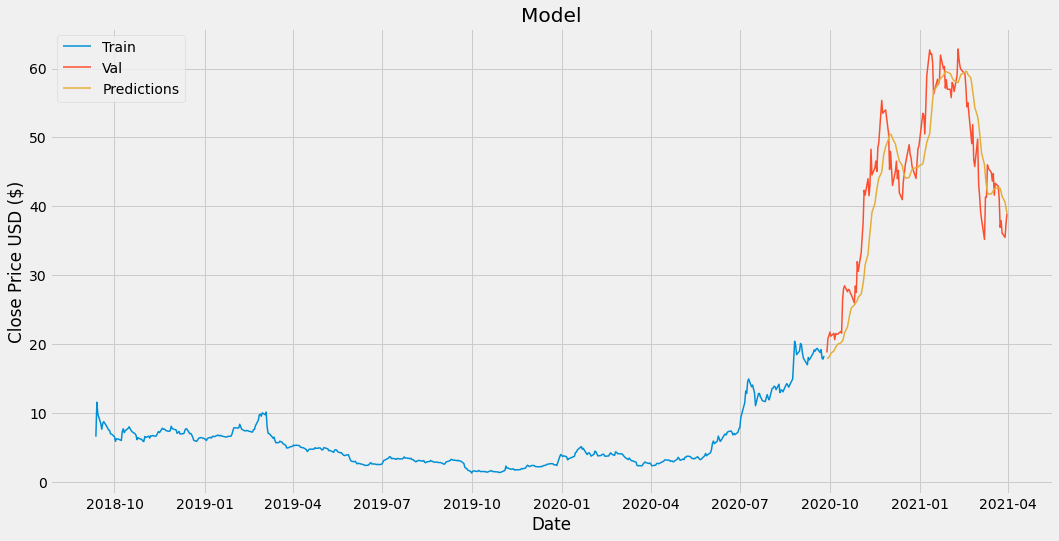

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'], lw=1.5)
plt.plot(valid[['Close', 'Predictions']], lw=1.5)
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [19]:
#Show the valid  and predictions prices
valid

,Close,Predictions
Date,,
2020-09-28,18.809999,18.022678
2020-09-29,20.850000,17.985638
2020-09-30,21.219999,18.115257
2020-10-01,21.760000,18.359188
2020-10-02,21.180000,18.692875
...,...,...
2021-03-25,37.939999,42.072906
2021-03-26,36.130001,41.437962
2021-03-29,35.509998,40.637493
